In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv('6.1 heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_disease.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [7]:
heart_disease.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

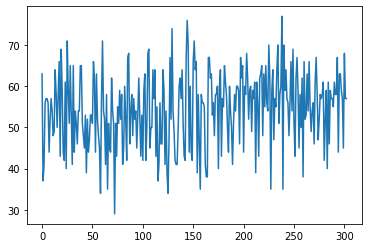

In [8]:
plt.plot(heart_disease['age'])

<BarContainer object of 303 artists>

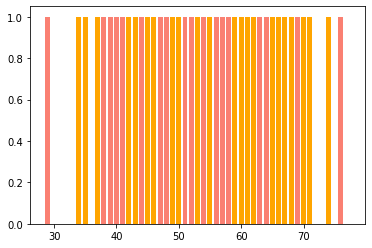

In [12]:
x=heart_disease['age']
y=heart_disease['target']
plt.bar(x, y, color=['salmon', 'orange'])

In [13]:
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x.shape

(303, 13)

In [14]:
heart_disease.shape

(303, 14)

In [15]:
y.shape

(303,)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train.shape, x_test.shape

((242, 13), (61, 13))

In [20]:
x.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [21]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
clf = RandomForestClassifier().fit(x_train, y_train)

In [26]:
y_predic = clf.predict(x_test)

In [29]:
y_predic, np.array(y_test)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64),
 array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64))

In [32]:
pd.crosstab(y_predic, np.array(y_test))

col_0,0,1
row_0,,
0,19,7
1,4,31


In [33]:
# Checking the Accuracy of test data

clf.score(x_test, y_test)

0.819672131147541

# Evaluating this Classifier Model
## 1. Accuracy
## 2. ROC Curve
## 3. Classification Metrix
## 4. ...........

In [34]:
# Accuracy

from sklearn.model_selection import cross_val_score

In [37]:
Accuracy = cross_val_score(clf, x, y, cv=5)

In [38]:
Accuracy

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

In [40]:
# Checkitn the mean of evaluation accuracy and matches with original test score by model

np.mean(Accuracy), clf.score(x_test, y_test)

(0.8249180327868851, 0.819672131147541)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.81967213, 0.82019672, 0.82072131, 0.8212459 , 0.82177049,
        0.82229508, 0.82281967, 0.82334426, 0.82386885, 0.82439344,
        0.82491803]),
 <a list of 10 Patch objects>)

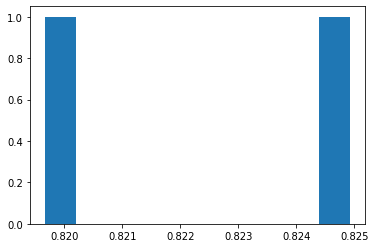

In [47]:
# let's plot this to understand well

x = np.mean(Accuracy)
y = clf.score(x_test, y_test)

plt.hist((x, y))

## 2. ROC Curve


In [52]:
from sklearn.metrics import roc_curve

In [53]:
# it takes two parameters  1. our labels and 2nd is positive probabilies of accuracy

y_probability = clf.predict_proba(x_test)

In [57]:
y_probability[:10], y_probability.size

(array([[0.07, 0.93],
        [0.43, 0.57],
        [0.13, 0.87],
        [0.28, 0.72],
        [0.53, 0.47],
        [0.16, 0.84],
        [0.05, 0.95],
        [0.02, 0.98],
        [0.22, 0.78],
        [0.95, 0.05]]),
 122)

In [60]:
y_prob_positive = y_probability[: ,1]
y_prob_positive, y_prob_positive.size

(array([0.93, 0.57, 0.87, 0.72, 0.47, 0.84, 0.95, 0.98, 0.78, 0.05, 0.75,
        0.91, 0.21, 0.58, 0.75, 0.9 , 0.81, 0.39, 0.66, 0.36, 0.29, 0.87,
        0.72, 0.13, 0.21, 0.25, 0.75, 0.61, 0.91, 0.18, 0.94, 0.5 , 0.65,
        0.47, 0.31, 0.02, 0.19, 0.44, 0.86, 0.82, 0.77, 0.63, 0.48, 0.99,
        0.24, 0.02, 0.06, 0.16, 0.82, 0.24, 0.81, 0.74, 0.18, 0.03, 0.71,
        0.25, 0.12, 0.58, 0.77, 0.76, 0.79]),
 61)

In [61]:
ROC = roc_curve(y_test, y_prob_positive)

In [62]:
ROC

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04347826, 0.04347826, 0.13043478, 0.13043478,
        0.17391304, 0.17391304, 0.17391304, 0.17391304, 0.30434783,
        0.30434783, 0.34782609, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.91304348, 1.        ]),
 array([0.        , 0.02631579, 0.13157895, 0.18421053, 0.21052632,
        0.26315789, 0.31578947, 0.42105263, 0.47368421, 0.52631579,
        0.55263158, 0.60526316, 0.63157895, 0.63157895, 0.73684211,
        0.73684211, 0.78947368, 0.86842105, 0.92105263, 0.92105263,
        0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
        1.        , 1.        , 1.        ]),
 array([1.99, 0.99, 0.93, 0.91, 0.9 , 0.87, 0.84, 0.81, 0.78, 0.77, 0.76,
        0.75, 0.74, 0.72, 0.63, 0.61, 0.58, 0.48, 0.47, 0.36, 0.31, 0.29,
        0.24, 0.21, 0.19, 0.18, 0.03, 0.02]))

In [67]:
ROC[:10]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04347826, 0.04347826, 0.13043478, 0.13043478,
        0.17391304, 0.17391304, 0.17391304, 0.17391304, 0.30434783,
        0.30434783, 0.34782609, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.91304348, 1.        ]),
 array([0.        , 0.02631579, 0.13157895, 0.18421053, 0.21052632,
        0.26315789, 0.31578947, 0.42105263, 0.47368421, 0.52631579,
        0.55263158, 0.60526316, 0.63157895, 0.63157895, 0.73684211,
        0.73684211, 0.78947368, 0.86842105, 0.92105263, 0.92105263,
        0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
        1.        , 1.        , 1.        ]),
 array([1.99, 0.99, 0.93, 0.91, 0.9 , 0.87, 0.84, 0.81, 0.78, 0.77, 0.76,
        0.75, 0.74, 0.72, 0.63, 0.61, 0.58, 0.48, 0.47, 0.36, 0.31, 0.29,
        0.24, 0.21, 0.19, 0.18, 0.03, 0.02]))

In [68]:
fpr, tpr, threshold = roc_curve(y_test, y_prob_positive)

In [69]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04347826, 0.04347826, 0.13043478, 0.13043478,
       0.17391304, 0.17391304, 0.17391304, 0.17391304, 0.30434783,
       0.30434783, 0.34782609, 0.52173913, 0.56521739, 0.60869565,
       0.65217391, 0.91304348, 1.        ])

In [70]:
tpr

array([0.        , 0.02631579, 0.13157895, 0.18421053, 0.21052632,
       0.26315789, 0.31578947, 0.42105263, 0.47368421, 0.52631579,
       0.55263158, 0.60526316, 0.63157895, 0.63157895, 0.73684211,
       0.73684211, 0.78947368, 0.86842105, 0.92105263, 0.92105263,
       0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
       1.        , 1.        , 1.        ])

In [71]:
threshold

array([1.99, 0.99, 0.93, 0.91, 0.9 , 0.87, 0.84, 0.81, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.72, 0.63, 0.61, 0.58, 0.48, 0.47, 0.36, 0.31, 0.29,
       0.24, 0.21, 0.19, 0.18, 0.03, 0.02])

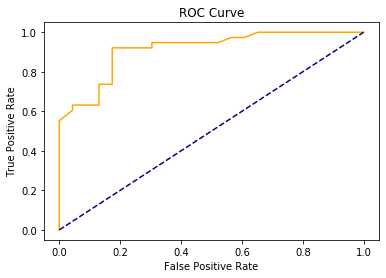

In [77]:
# plot this to make visualization

plt.plot(fpr, tpr, color='orange', label='roc')
plt.plot((0, 1), (0, 1), color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [80]:
# creating a function to show this plot against fpr and tpr

def roc_curve_plot(fpr, tpr):
    plt.plot(fpr, tpr, color='salmon', label='ROC')
    plt.plot((0, 1), (0, 1), color='black', linestyle='--', label='Guessing......')
    
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show();

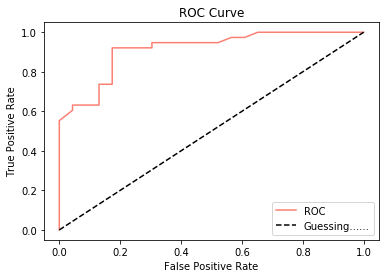

In [81]:
roc_curve_plot(fpr, tpr)

In [82]:
from sklearn.metrics import roc_auc_score

In [86]:
# on simple predictions
roc_accuracy = roc_auc_score(y_test, y_predic)

In [87]:
roc_accuracy

0.8209382151029748

In [89]:
# on positive probabilities on testing features
roc_auc_score(y_test, y_prob_positive)

0.9130434782608695